### Script to check if IS correlates with
1. Dosage range overlap; GDSC mid dosage (just a vaue to summarize dosage range tested)
2. ic50 (to show resistant pairs tend to be less inconsistent)
3. Target pathway
##### Also, plot corr of ic50 from ccle and gdsc 

In [1]:
__author__ = 'Aanchal'

In [2]:
import pandas as pd
import FUNCTIONS as f
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats  as stats
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [8]:
th=7.06
FeatureMatrix=pd.read_csv('../data_processed/FittedCurvesCommonPairs_features/Feature_Matrix_FLatPerDrugFitting_15features.csv') # #Normalized_outliersCapped

#merge with the foll to get GDSC min and mid dosage
pair_dosages=pd.read_csv('../data_processed/GDSC_pair_dosage_range.csv').sort_values('Standard cell line name')
pair_dosages['mid_dosage']=pair_dosages['min_dosage']+(pair_dosages['max_dosage']-pair_dosages['min_dosage'])/2
FeatureMatrix=pd.merge(FeatureMatrix, pair_dosages,on=['Standard cell line name','Standard drug name']) 

#filter resistant Cls sp=sensitivePairs
FeatureMatrix_sp=FeatureMatrix[FeatureMatrix['ic50_mode']<=th]

#filter Cls which havent been tested for all drugs
all_cls=FeatureMatrix.groupby(FeatureMatrix['Standard cell line name']).count()[['Standard drug name']]
FeatureMatrix_impcls=FeatureMatrix.loc[FeatureMatrix['Standard cell line name'].isin(all_cls[all_cls['Standard drug name']==15].index)]
#filter resistant Cls  sp_ic=sensitivePairs_impcls
FeatureMatrix_sp_ic=FeatureMatrix_impcls[FeatureMatrix_impcls['ic50_mode']<=th]

In [9]:
FeatureMatrix_sp=f.getSensitivityMetrics(FeatureMatrix_sp)
FeatureMatrix_sp_ic=f.getSensitivityMetrics(FeatureMatrix_sp_ic)


In [10]:
plotting_df1=pd.read_csv('../data_processed/InconsistencyFactorAnalysis/drug_analysis_onlySensitiveCLs.csv', index_col=0) #1843 DW/sensitive pairs
plotting_df2=pd.read_csv('../data_processed/InconsistencyFactorAnalysis/drug_analysis_onlySensitiveCLs_testedFor15drugs.csv', index_col=0) #67 Cls which have been tested for all 15 drugs

plotting_df1['GDSC mid dosage']=(plotting_df1['GDSC min dosage']+(plotting_df1['GDSC max dosage']-plotting_df1['GDSC min dosage'])/2).round(2)
plotting_df2['GDSC mid dosage']=(plotting_df2['GDSC min dosage']+(plotting_df2['GDSC max dosage']-plotting_df2['GDSC min dosage'])/2).round(2)


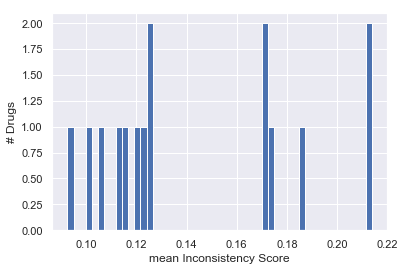

In [11]:
from pylab import hist
hist(plotting_df1['mean IS'],50,label='Drugs')
plt.xlabel('mean Inconsistency Score')
plt.ylabel('# Drugs')
plt.savefig('../figures/InconsistencyFactorAnalysis/meanISperDrug_distibution.svg')
plt.savefig('../figures/InconsistencyFactorAnalysis/meanISperDrug_distibution.png')

### Factor1: IS (median AAA) vs overlap

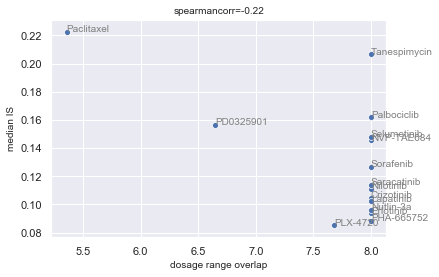

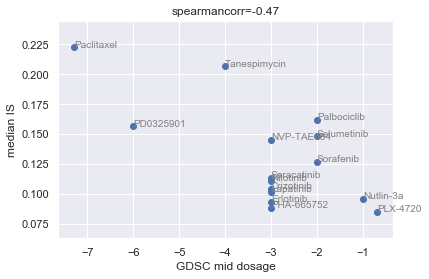

In [12]:
#plot distribution or median instead of just mean
#f.clusteringBoxplot(AAA_matrix, 'Standard drug name', 'IS','',-0.1,1)

f.plotVectorsGetCorr_seaborn('dosage range overlap','median IS',plotting_df2,'spearman' )
for i, txt in enumerate(plotting_df2['Standard drug name']):
        plt.text(plotting_df2.loc[txt,'dosage range overlap'], plotting_df2.loc[txt,'median IS'], txt, color='grey')

plt.savefig('../figures/InconsistencyFactorAnalysis/medianIS_vs_overlap.svg')
plt.savefig('../figures/InconsistencyFactorAnalysis/medianIS_vs_overlap.png')
plt.show()

#min and mid dosages are equally corealted since mid is just shifted from min with a few units

f.plotVectorsGetCorr(plotting_df2, 'GDSC mid dosage',plotting_df2,'median IS',[],'spearman' )
for i, txt in enumerate(plotting_df2['Standard drug name']):
        plt.text(plotting_df2.loc[txt,'GDSC mid dosage'], plotting_df2.loc[txt,'median IS'], txt, color='grey')

plt.savefig('../figures/InconsistencyFactorAnalysis/medianIS_vs_GDSCmidDosage.svg')
plt.savefig('../figures/InconsistencyFactorAnalysis/medianIS_vs_GDSCmidDosage.png')
plt.show()

In [13]:
#p val
p=stats.pearsonr(plotting_df2['dosage range overlap'], plotting_df2['median IS'])
s=stats.spearmanr(plotting_df2['dosage range overlap'], plotting_df2['median IS'])
print("Pearson r, pval: "+str(p[0].round(2) ) +', '+str(p[1].round(3)))
print("Spearman r, pval: "+str(s[0].round(2) )+', '+str(s[1].round(3)) )

p=stats.pearsonr(plotting_df2['GDSC mid dosage'], plotting_df2['median IS'])
s=stats.spearmanr(plotting_df2['GDSC mid dosage'], plotting_df2['median IS'])
print("Pearson r, pval: "+str(p[0].round(2) ) +', '+str(p[1].round(3)))
print("Spearman r, pval: "+str(s[0].round(2) )+', '+str(s[1].round(3)) )

#plotting_df2['dosage range overlap'].corr(plotting_df2['median IS'],method='spearman')

Pearson r, pval: -0.6, 0.018
Spearman r, pval: -0.22, 0.421
Pearson r, pval: -0.67, 0.006
Spearman r, pval: -0.47, 0.075


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

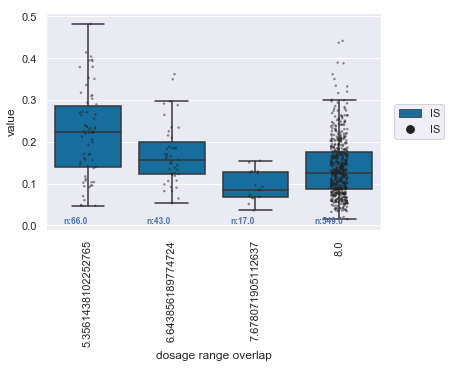

In [14]:
f.clusteringBoxplot(FeatureMatrix_sp_ic.merge(plotting_df2),'dosage range overlap','IS', 'A',0,0)
plt.xticks(rotation=90)

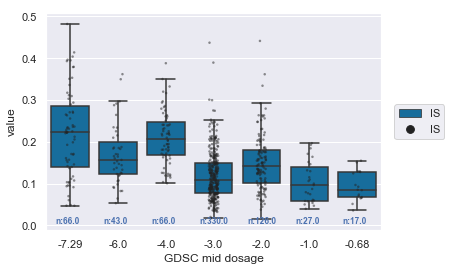

In [15]:
f.clusteringBoxplot(FeatureMatrix_sp_ic.merge(plotting_df2),'GDSC mid dosage','IS', 'A',0,0 )

##### Plot to show gdsc is less sensitive than ccle at lower ranges (ranges to the left)

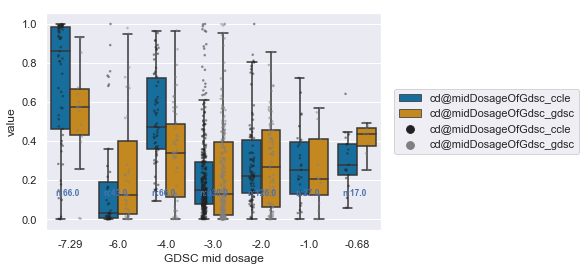

In [16]:
#f.clusteringBoxplot(FeatureMatrix_sp_ic.merge(plotting_df2) , 'GDSC mid dosage',['ic50_ccle','ic50_gdsc'],'',0.11,0)
f.clusteringBoxplot(FeatureMatrix_sp_ic.merge(plotting_df2) , 'GDSC mid dosage',['cd@midDosageOfGdsc_ccle','cd@midDosageOfGdsc_gdsc'],'',0.11,0)

##### effect of moA

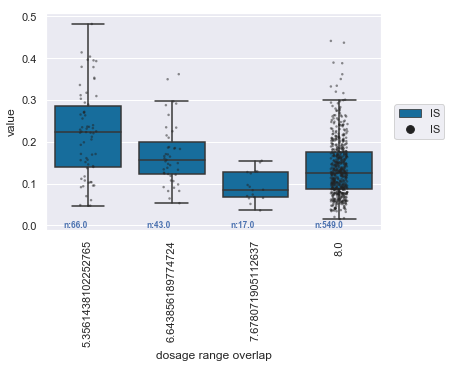

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

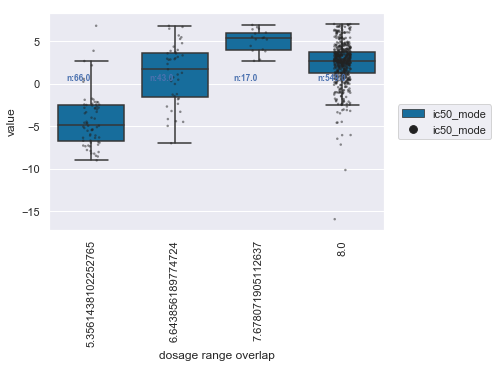

In [17]:
pdf =FeatureMatrix_sp_ic.merge(plotting_df2)
f.clusteringBoxplot(pdf.sort_values('median IS') , 'dosage range overlap','IS','',-0.01,0)#, plotting_df1.groupby(['Target Pathway'])['median ic50_mode','median IS'].first().sort_values('median IS').index)
plt.xticks(rotation=90)
plt.savefig('../figures/InconsistencyFactorAnalysis/bp_ISdistributionPerOverlap.svg', bbox_inches='tight')
plt.savefig('../figures/InconsistencyFactorAnalysis/bp_ISdistributionPerOverlap.png', bbox_inches='tight')
plt.show()


f.clusteringBoxplot(pdf.sort_values('ic50_mode') , 'dosage range overlap','ic50_mode','',0.11,0)
plt.xticks(rotation=90)

#f.plotVectorsGetCorr_seaborn('dosage range overlap','IS',pdf ,'spearman','Standard drug name', 18)

#### Are the good drugs with overlap of 2 uM good (not following the trend) because they are inactive drugss? => YES

### Factor2: mean AAA vs (median ic50_mode)

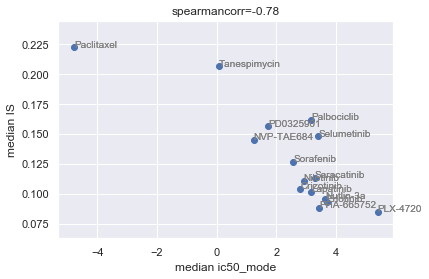

In [18]:
f.plotVectorsGetCorr(plotting_df2,'median ic50_mode',plotting_df2,'median IS',plotting_df2['Standard drug name'] ,'spearman')
for i, txt in enumerate(plotting_df2['Standard drug name']):
        plt.text(plotting_df2.loc[txt,'median ic50_mode'], plotting_df2.loc[txt,'median IS'], txt, color='grey')
plt.savefig('../figures/InconsistencyFactorAnalysis/medianIS_vs_medianIC50mode.svg')
plt.savefig('../figures/InconsistencyFactorAnalysis/medianIS_vs_medianIC50mode.png')
plt.show()


In [19]:
#p val
p=stats.pearsonr(plotting_df2['median ic50_mode'], plotting_df2['median IS'])
s=stats.spearmanr(plotting_df2['median ic50_mode'], plotting_df2['median IS'])
print("Pearson r, pval: "+str(p[0].round(2) ) +', '+str(p[1].round(4)))
print("Spearman r, pval: "+str(s[0].round(2) )+', '+str(s[1].round(4)) )

Pearson r, pval: -0.84, 0.0001
Spearman r, pval: -0.78, 0.0006


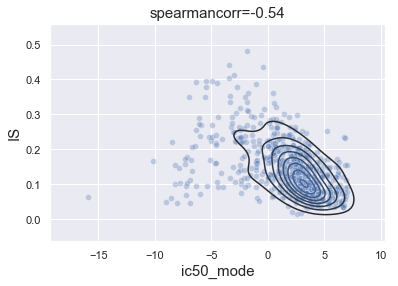

In [20]:
f.plotVectorsGetCorr_seaborn('ic50_mode','IS',FeatureMatrix_sp_ic ,'spearman','', 15, 0.3)
sns.kdeplot(FeatureMatrix_sp_ic['ic50_mode'],FeatureMatrix_sp_ic['IS'])
plt.savefig('../figures/InconsistencyFactorAnalysis/IS_vs_IC50mode.svg')
plt.savefig('../figures/InconsistencyFactorAnalysis/IS_vs_IC50mode.png')
plt.show()

### Factor2: mean AAA vs (Target pathway)

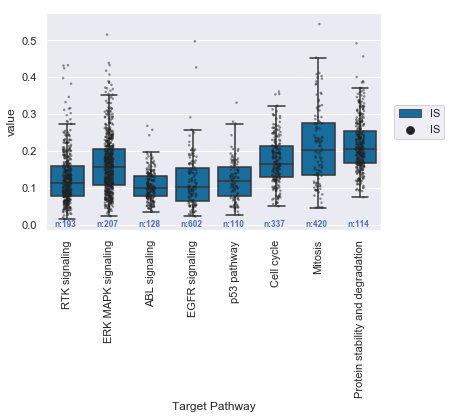

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

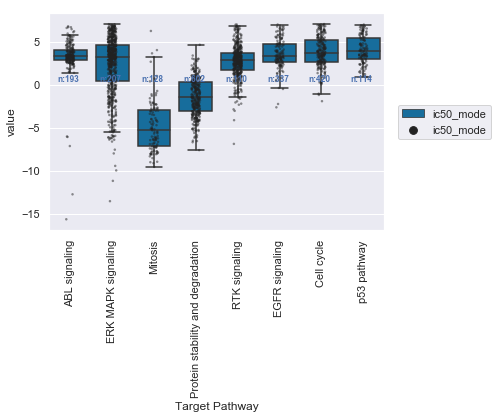

In [34]:
## FeatureMatrix_sensitivePairs_impcls if u want to apply 2 constrainst on CLs
pdf = FeatureMatrix_sp.merge(plotting_df1)
f.clusteringBoxplot(pdf.sort_values('median IS') , 'Target Pathway','IS','',-0.01,0)#, plotting_df1.groupby(['Target Pathway'])['median ic50_mode','median IS'].first().sort_values('median IS').index)
plt.xticks(rotation=90)
plt.savefig('../figures/InconsistencyFactorAnalysis/bp_ISdistributionPerPathway.svg', bbox_inches='tight')
plt.savefig('../figures/InconsistencyFactorAnalysis/bp_ISdistributionPerPathway.png', bbox_inches='tight')
plt.show()

f.clusteringBoxplot(pdf.sort_values('ic50_mode') , 'Target Pathway','ic50_mode','',0.11,0)
plt.xticks(rotation=90)

In [35]:
plotting_df1.groupby(['Target Pathway','Standard drug name'])['dosage range overlap','median ic50_mode','median IS'].first().round(2)
#plotting_df.sort_values(['Target Pathway','Standard drug name'])
#plotting_df.set_index(['Target Pathway','Standard drug name'])

dosage range overlap  \
Target Pathway                    Standard drug name                         
ABL signaling                     Nilotinib                           8.00   
Cell cycle                        Palbociclib                         8.00   
EGFR signaling                    Erlotinib                           8.00   
                                  Lapatinib                           8.00   
ERK MAPK signaling                PD0325901                           6.64   
                                  PLX-4720                            7.68   
                                  Selumetinib                         8.00   
Mitosis                           Paclitaxel                          5.36   
Protein stability and degradation Tanespimycin                        8.00   
RTK signaling                     Crizotinib                          8.00   
                                  NVP-TAE684                          8.00   
                                  PHA-665752                          8.00   
                                  Saracatinib                         8.00   
                                  Sorafenib                           8.00   
p53 pathway                       Nutlin-3a                           8.00   

                                                      median ic50_mode  \
Target Pathway                    Standard drug name                     
ABL signaling                     Nilotinib                       3.33   
Cell cycle                        Palbociclib                     3.68   
EGFR signaling                    Erlotinib                       3.70   
                                  Lapatinib                       3.24   
ERK MAPK signaling                PD0325901                       1.35   
                                  PLX-4720                        4.21   
                                  Selumetinib                     3.54   
Mitosis                           Paclitaxel                     -5.23   
Protein stability and degradation Tanespimycin                   -1.47   
RTK signaling                     Crizotinib                      2.96   
                                  NVP-TAE684                      1.25   
                                  PHA-665752                      3.48   
                                  Saracatinib                     3.13   
                                  Sorafenib                       2.83   
p53 pathway                       Nutlin-3a                       3.95   

                                                      median IS  
Target Pathway                    Standard drug name             
ABL signaling                     Nilotinib                0.10  
Cell cycle                        Palbociclib              0.17  
EGFR signaling                    Erlotinib                0.10  
                                  Lapatinib                0.10  
ERK MAPK signaling                PD0325901                0.18  
                                  PLX-4720                 0.09  
                                  Selumetinib              0.16  
Mitosis                           Paclitaxel               0.20  
Protein stability and degradation Tanespimycin             0.20  
RTK signaling                     Crizotinib               0.10  
                                  NVP-TAE684               0.16  
                                  PHA-665752               0.08  
                                  Saracatinib              0.12  
                                  Sorafenib                0.12  
p53 pathway                       Nutlin-3a                0.12

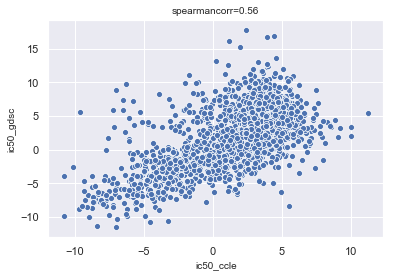

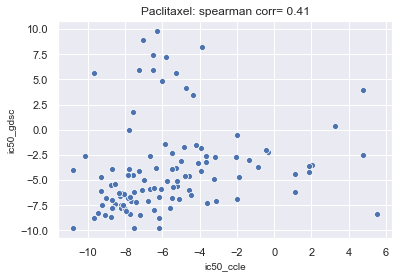

Paclitaxel : 0.41


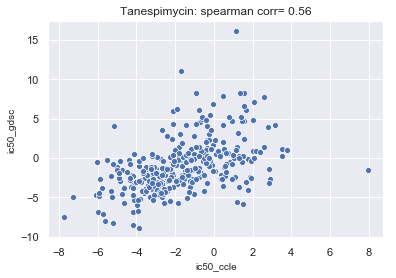

Tanespimycin : 0.56


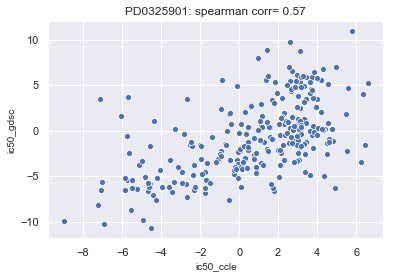

PD0325901 : 0.57


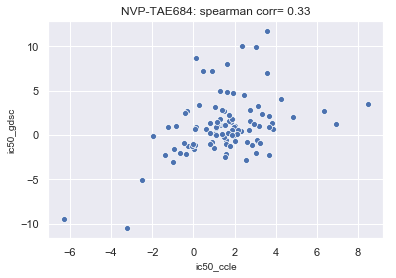

NVP-TAE684 : 0.33


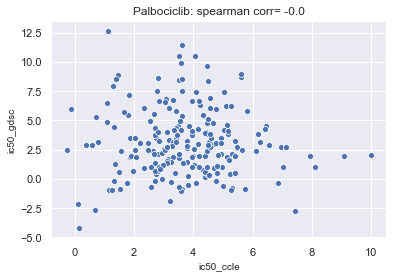

Palbociclib : -0.0


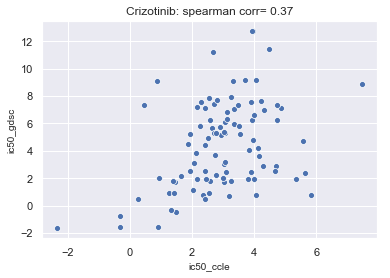

Crizotinib : 0.37


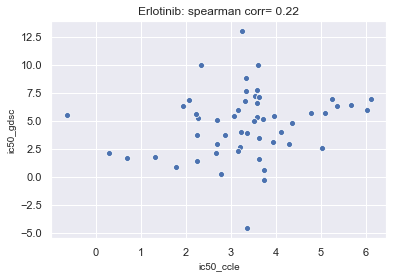

Erlotinib : 0.22


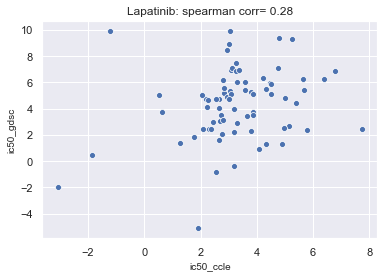

Lapatinib : 0.28


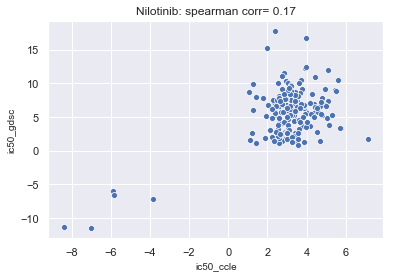

Nilotinib : 0.17


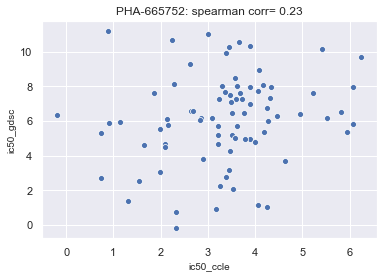

PHA-665752 : 0.23


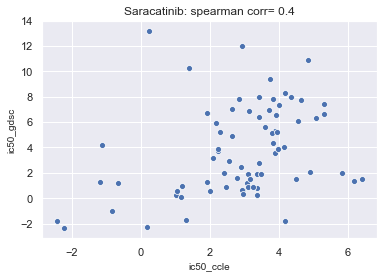

Saracatinib : 0.4


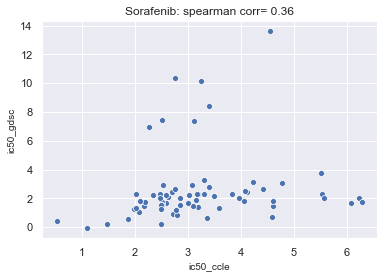

Sorafenib : 0.36


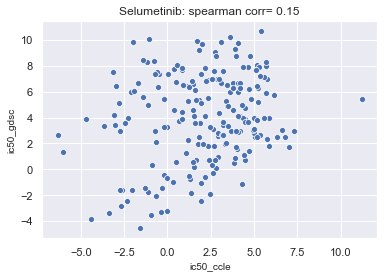

Selumetinib : 0.15


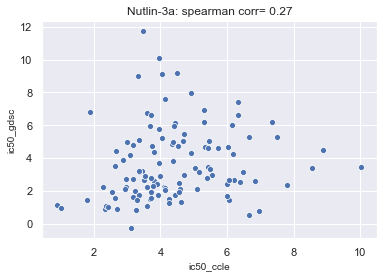

Nutlin-3a : 0.27


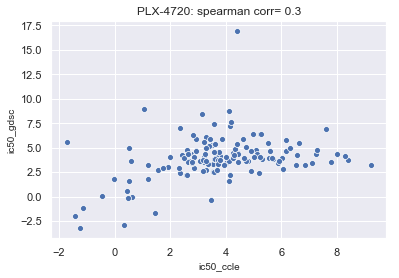

PLX-4720 : 0.3


In [36]:
#Corr bw ccle ic50 and gdsc ic50
plotting_df=FeatureMatrix_sp.merge(plotting_df1)

corr=f.plotVectorsGetCorr_seaborn('ic50_ccle','ic50_gdsc',plotting_df,'spearman' )
plt.show()
#df=plotting_df[(plotting_df['Standard drug name'] !='Tanespimycin') & (plotting_df['Standard drug name'] !='Paclitaxel') ] 
#corr=f.plotVectorsGetCorr_seaborn('ic50_ccle','ic50_gdsc',df,'spearman' )

dname_list=['Paclitaxel', 'Tanespimycin', 'PD0325901', 'NVP-TAE684','Palbociclib', 'Crizotinib','Erlotinib','Lapatinib','Nilotinib','PHA-665752','Saracatinib','Sorafenib','Selumetinib', 'Nutlin-3a','PLX-4720']
#dname_list=['Paclitaxel', 'Lapatinib']
#dname_list=['Lapatinib']
for i in range(len(dname_list)):
    
    dname=dname_list[i]#'Paclitaxel'
    
    df=plotting_df[plotting_df['Standard drug name']==dname]
    corr=f.plotVectorsGetCorr_seaborn('ic50_ccle','ic50_gdsc',df,'spearman' )

    plt.title(dname+": spearman corr= "+str(corr))
    plt.show()
    print(dname+" : "+str(corr)) #outlier include, gdsc muts, actlitaxel corr incsed to 0.23

plt.show() 